Welcome to "***Clustering (Customer Segmentation) Project***".

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.figure_factory as ff
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

#### Load Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





---
---

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
df.drop(['CustomerID'], axis=1, inplace=True)

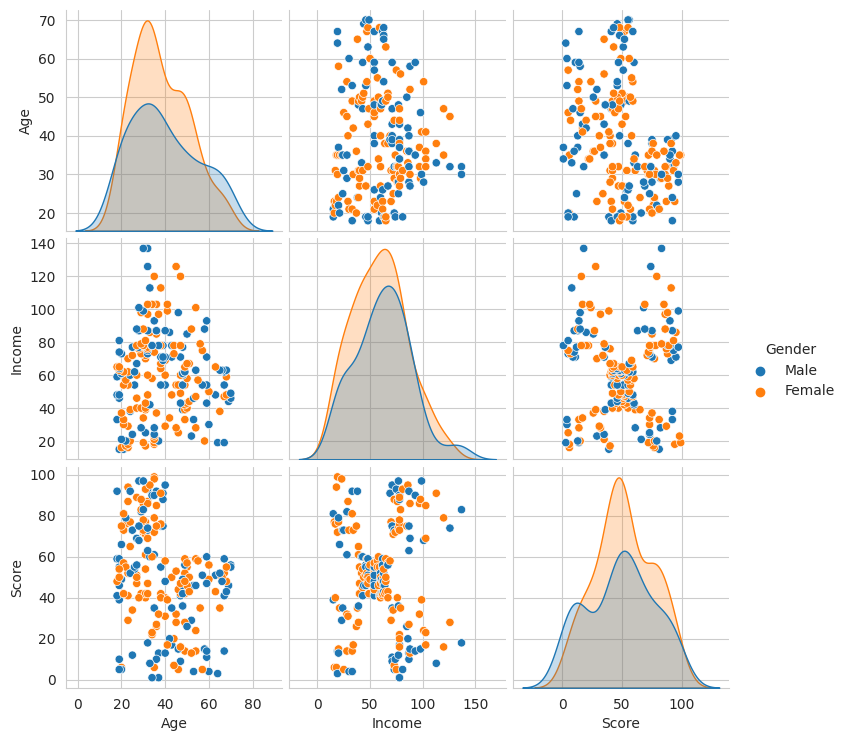

In [8]:
sns.pairplot(data=df, hue='Gender')
plt.show()

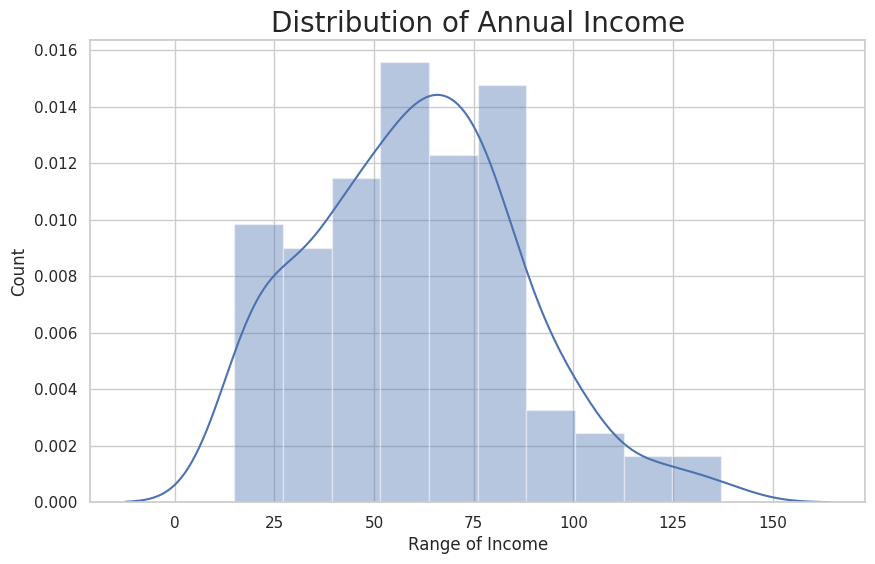

In [9]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Income'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Income')
plt.ylabel('Count');

Text(0, 0.5, 'Count')

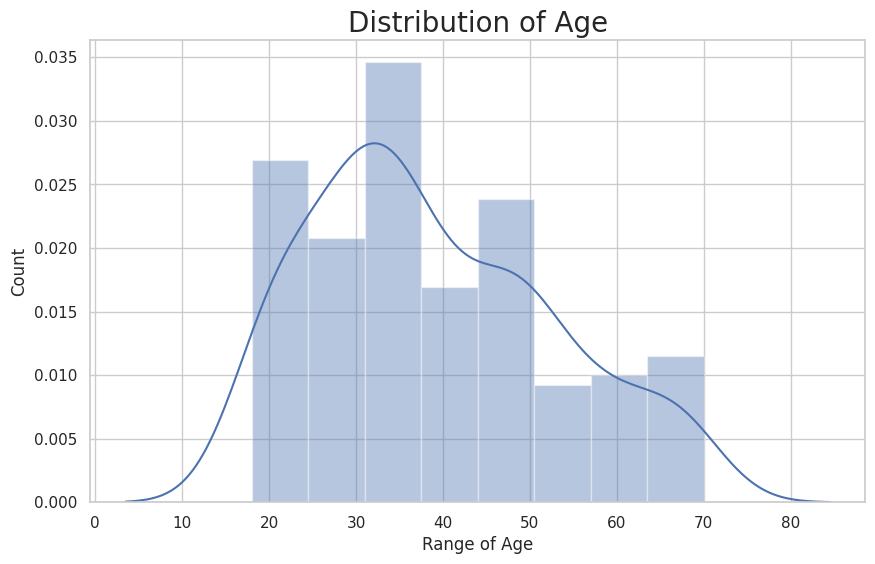

In [10]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

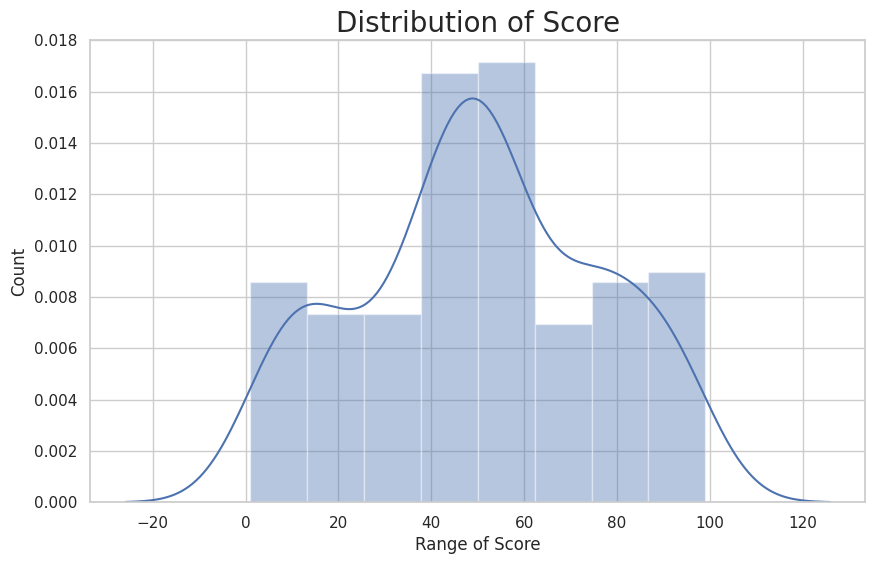

In [11]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Score'])
plt.title('Distribution of Score', fontsize = 20)
plt.xlabel('Range of Score')
plt.ylabel('Count')


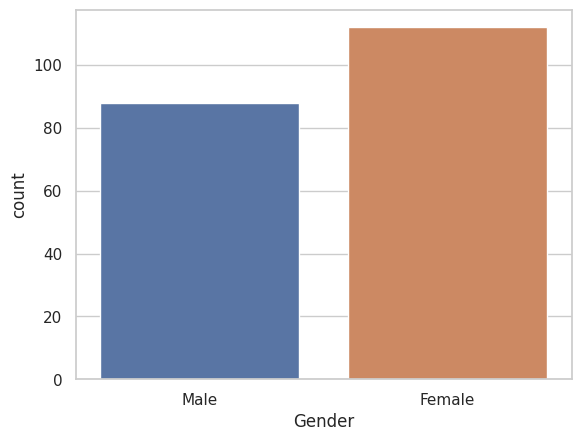

In [12]:
sns.countplot(x='Gender', data=df)
plt.show()

In [13]:
df.groupby('Gender').mean()

,Age,Income,Score
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


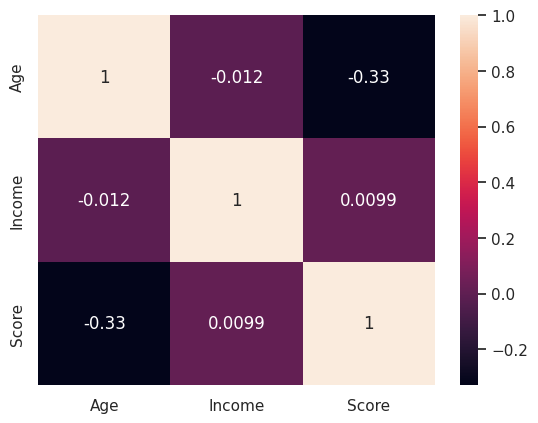

In [14]:
sns.heatmap(df.corr(), annot=True);

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm.

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis.

Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [ ]:
df1 = df.copy()

In [ ]:
"""
from sklearn.preprocessing import StandardScaler
numerical_columns = df.drop('Gender', axis=1).columns

scaler = StandardScaler()

# We scale all the columns except the categorical
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### Clustering based on Age and Spending Score - X

#### *i. Create a new dataset with two variables of your choice*

In [55]:
X = df[["Age", "Score"]]

#### *ii. Determine optimal number of clusters*

In [56]:
from sklearn.cluster import KMeans

In [57]:
ssd = []    # inertia  .. SSD, "Sum of Squared Distances"

K = range(2,10)

for k in K:                                          # Creates and trains the K-Means model for each different number of clusters.
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

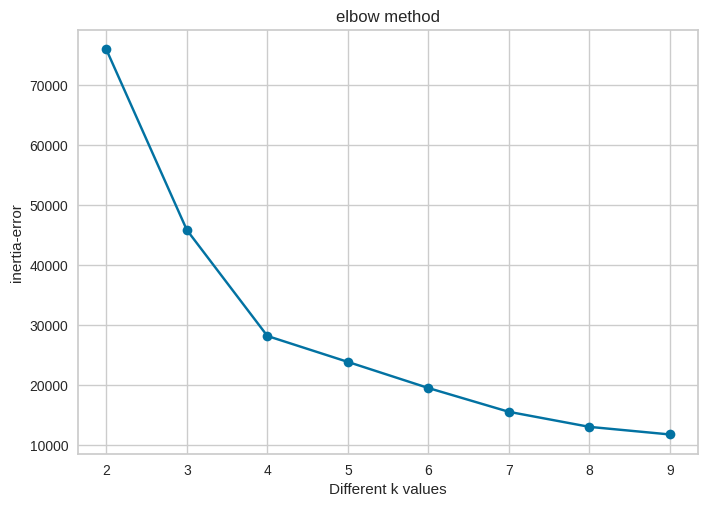

In [58]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")
plt.show()

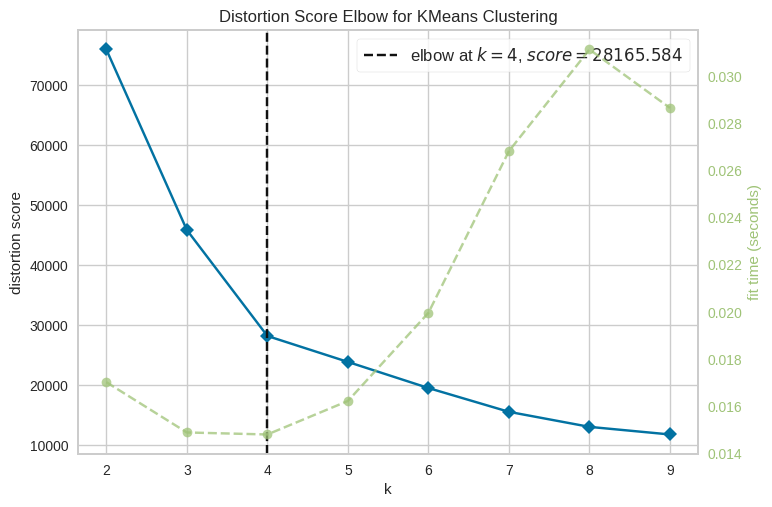

In [59]:

from yellowbrick.cluster import KElbowVisualizer   # yellowbrick selects the best elbow method

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) # algorithm will evaluate the model for every number of clusters between 2 and 10.

visualizer.fit(X1)
visualizer.show();

In [22]:
silhouette_score(X, model.labels_)

0.41485342159923116

In [60]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116


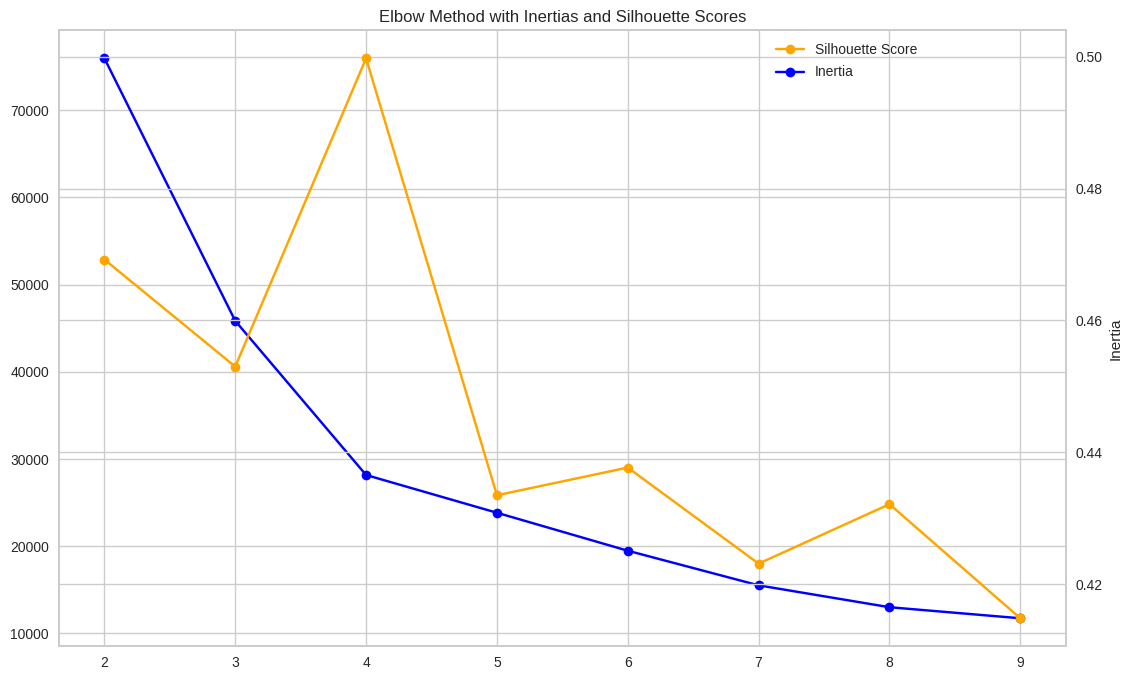

In [24]:
# Elbow ve Silhoutee skorunu bir arada gösteren grafik

inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(13, 8))
# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o', color='blue')
# Plot Silhouette Scores on a secondary y-axis
plt.legend(loc='lower left', bbox_to_anchor=(0.7, 0.9))
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')
# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

## Silhouette Visualizer

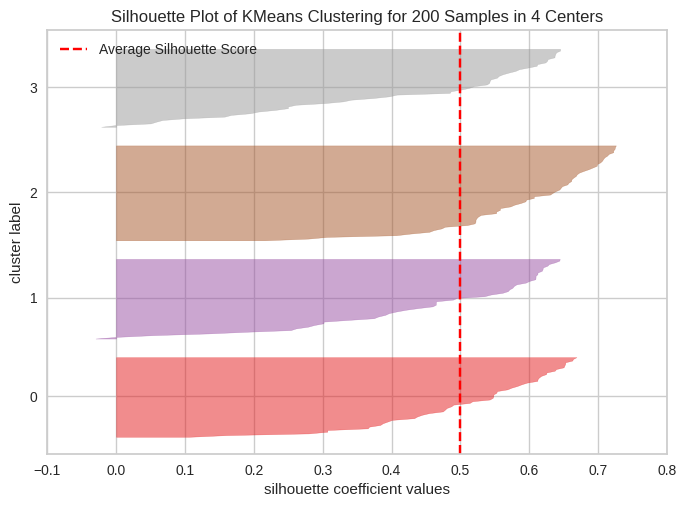

In [25]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model1 = KMeans(n_clusters=4, random_state=42)  # kmeans = 4 olarak seçtik ve ona göre çizim yaptı
visualizer = SilhouetteVisualizer(model1)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

It seems that the optimal number of clusters is 4.

#### *iii. Apply K Means*

In [26]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [27]:
y_kmeans

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [28]:
X.head()

,Age,Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


#### *iv. Visualizing and Labeling All the Clusters*

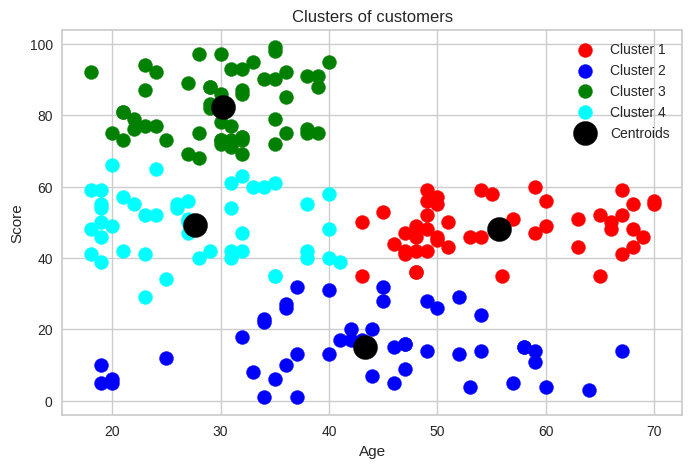

In [29]:
# Visualizing all the clusters
plt.figure(figsize=(8,5))
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Score')
plt.legend()
plt.show()

### Clustering based on Annual Income and Spending Score - X2

#### *i. Create a new dataset with two variables of your choice*

In [30]:
X1 = df[['Income','Score']]

#### *ii. Determine optimal number of clusters*

In [31]:
ssd = []    # inertia  .. SSD, "Sum of Squared Distances"

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X1)
    ssd.append(model.inertia_)

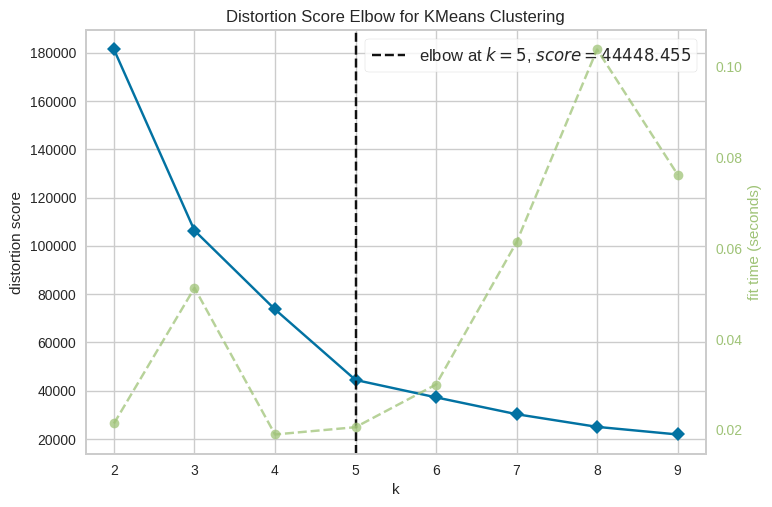

In [32]:
from yellowbrick.cluster import KElbowVisualizer   # yellowbrick selects the best elbow method

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) # algorithm will evaluate the model for every number of clusters between 2 and 10.

visualizer.fit(X1)
visualizer.show();

In [33]:
silhouette_score(X1, model.labels_)

0.4553729779390266

In [34]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.004873155110381675
For n_clusters=3, the silhouette score is 0.16758575712906634
For n_clusters=4, the silhouette score is 0.14423915122117295
For n_clusters=5, the silhouette score is 0.1632888738101461
For n_clusters=6, the silhouette score is 0.11253664329747584
For n_clusters=7, the silhouette score is 0.054239717819834096
For n_clusters=8, the silhouette score is -0.03782979088042056


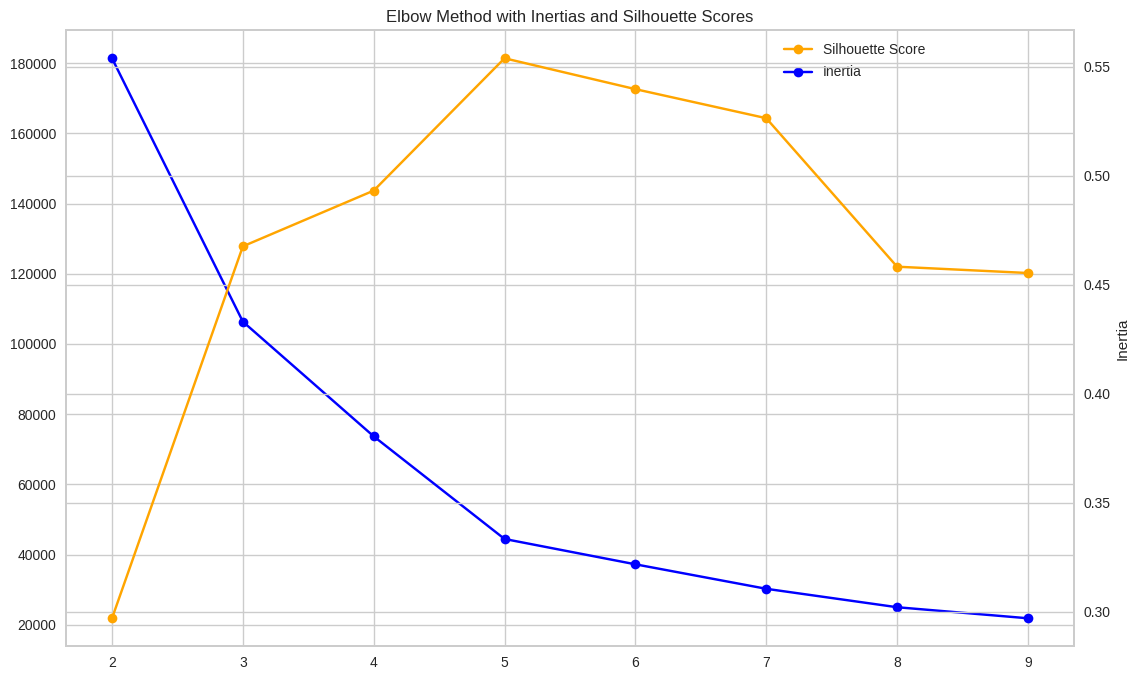

In [61]:

inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X1)
    silhouette = silhouette_score(X1, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(13, 8))
# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o', color='blue')
# Plot Silhouette Scores on a secondary y-axis
plt.legend(loc='lower left', bbox_to_anchor=(0.7, 0.9))
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')
# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

k = 5 has the best Silhouette score

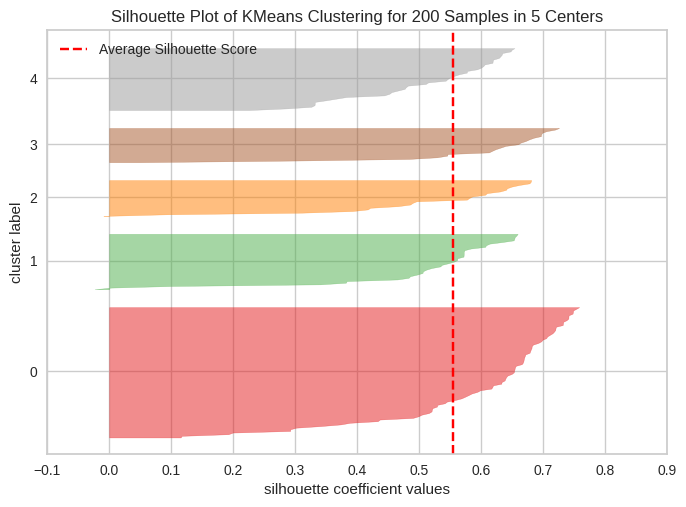

In [62]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)  # kmeans = 5
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [63]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=42)
y_kmeans=kmeans.fit_predict(X1)

#### *iv. Visualizing and Labeling All the Clusters*

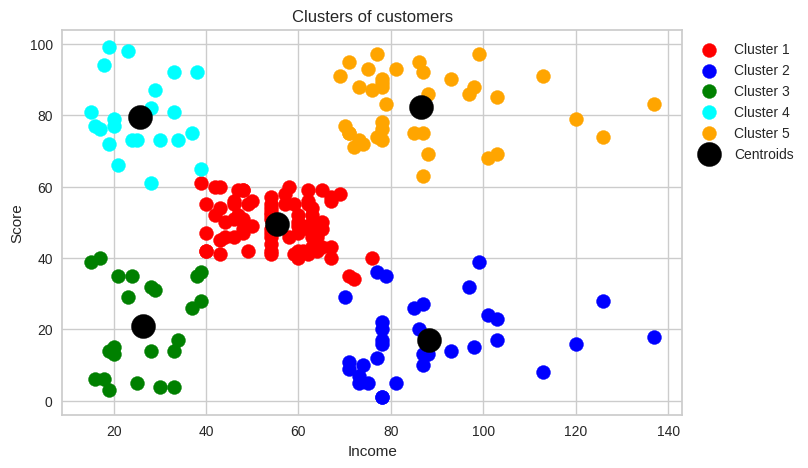

In [66]:
plt.figure(figsize=(8,5))
plt.scatter(X1.iloc[y_kmeans == 0, 0], X1.iloc[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X1.iloc[y_kmeans == 1, 0], X1.iloc[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X1.iloc[y_kmeans == 2, 0], X1.iloc[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X1.iloc[y_kmeans == 3, 0], X1.iloc[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X1.iloc[y_kmeans == 4, 0], X1.iloc[y_kmeans == 4, 1], s=100, c='orange', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Model Interpretation
Cluster 1  -> Earning less but spending more

Cluster 2  -> Average in terms of earning and spending

Cluster 3  -> Earning less , spending less

Cluster 4  -> earning less but spending more

Cluster 5  -> Earning high and also spending high

I would target cluster 5 based on their income and spending score.

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Clustering based on Age and Spending Score- X

In [40]:
hc_ward = linkage (y= X, method ="ward")
hc_complete = linkage (X, "complete")
hc_average = linkage (X, "average")
hc_single= linkage(X ,"single")

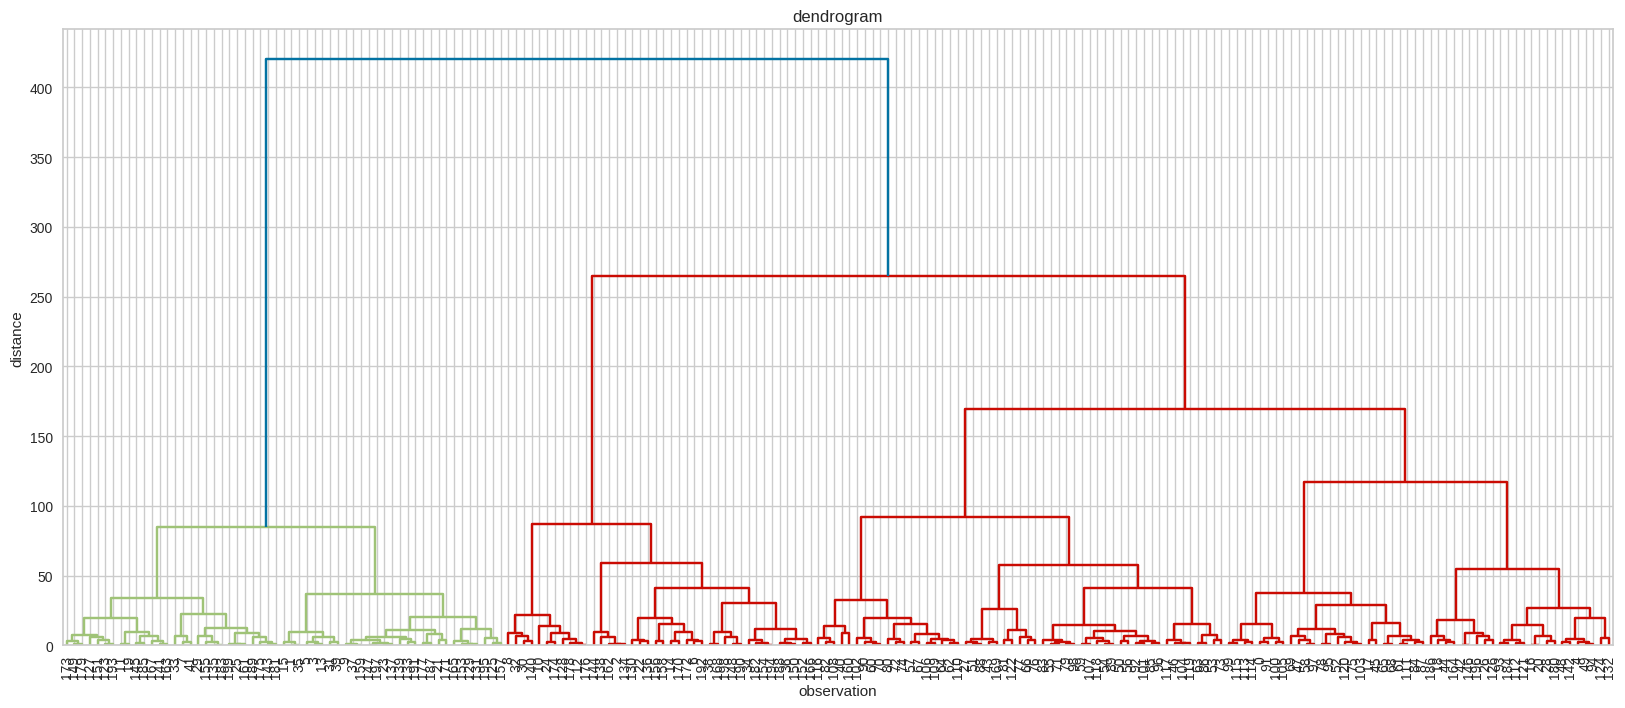

In [41]:


plt.figure(figsize= (20,8))
plt.title("dendrogram")
plt.xlabel("observation")
plt.ylabel("distance")
dendrogram (hc_ward, leaf_font_size=10);  # dendogram with ward

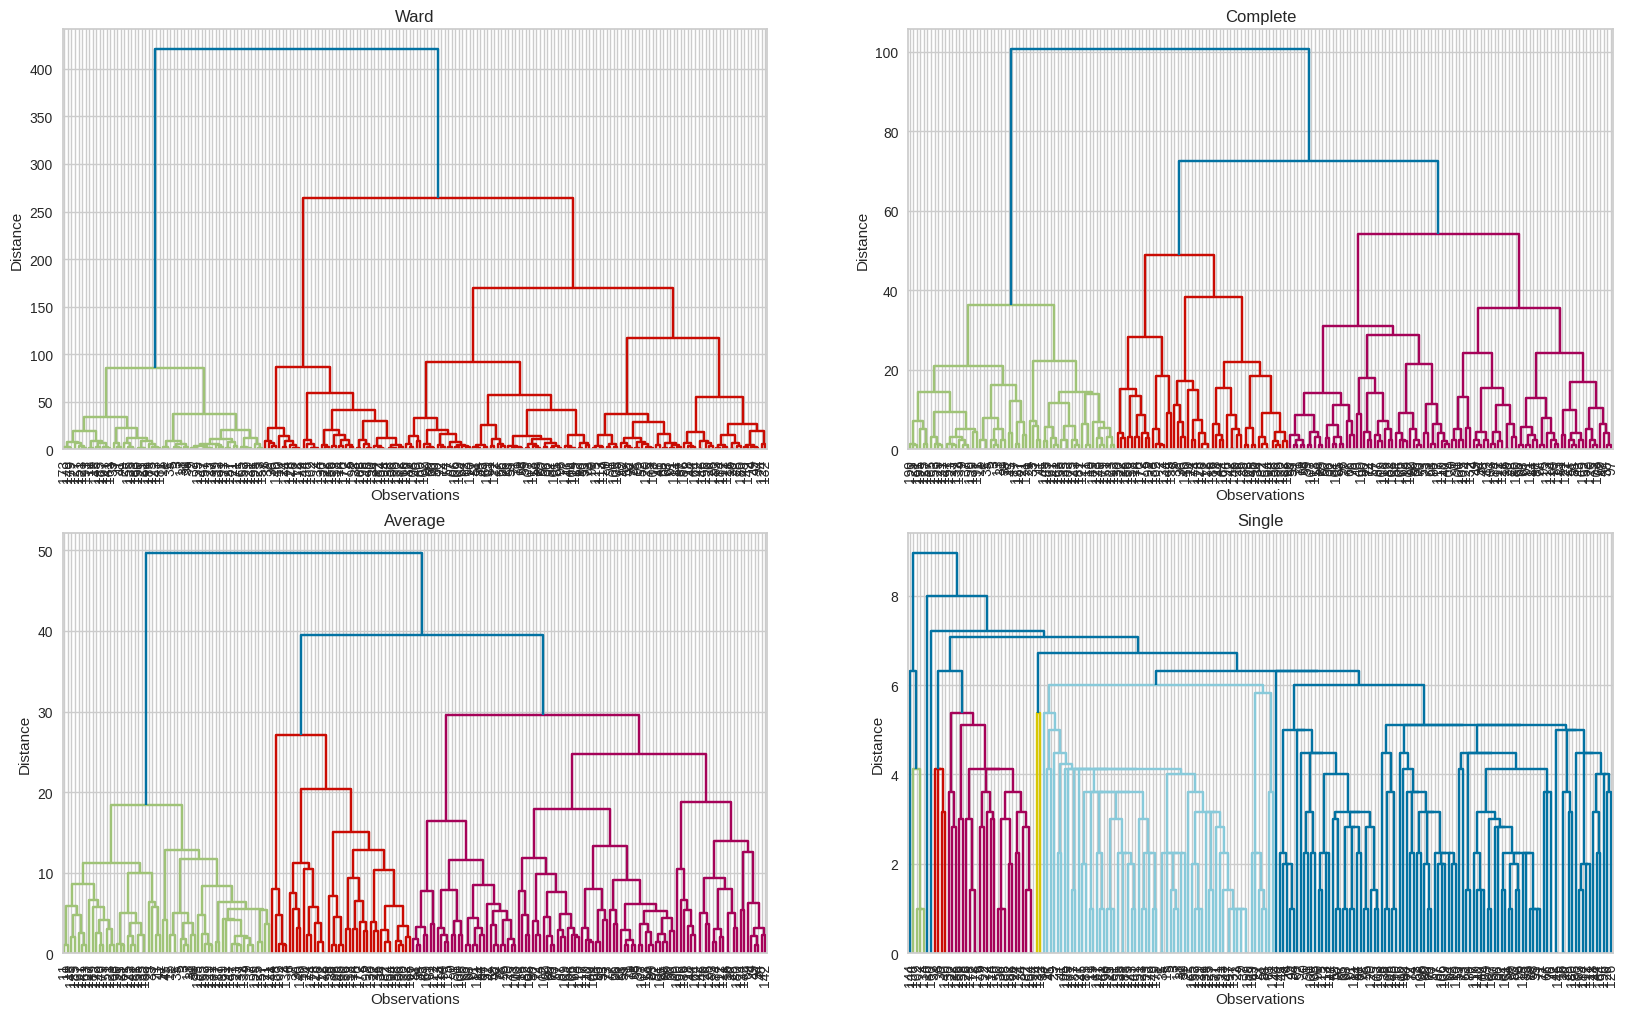

In [42]:
# dendogram for all methods

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

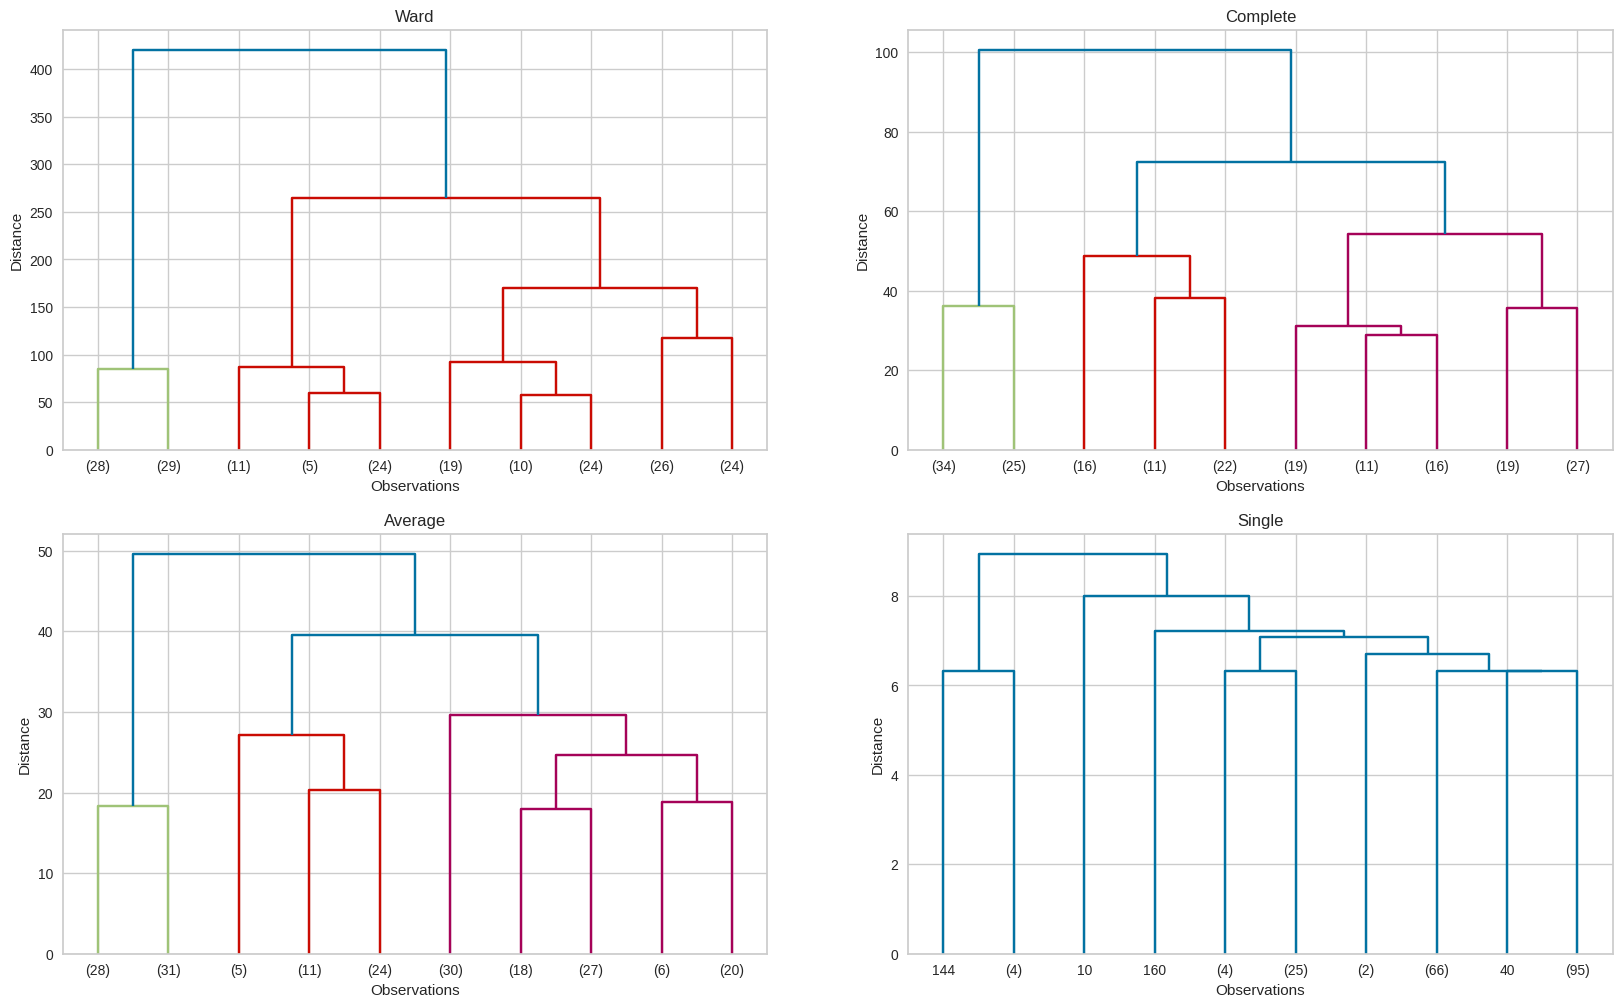

In [43]:
# grafiklerin gorunumunu sadeleştirleim

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10);  # p en son dllarda oluşacak küme sayısı

It seems that the optimal number of clusters is 3.

### ii. *Apply Agglomerative Clustering*

In [44]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X, model.labels_)})

f'Silhouette Score for {2} clusters {0.4549465643222241}
f'Silhouette Score for {3} clusters {0.4411791686353356}
f'Silhouette Score for {4} clusters {0.4602496389565028}
f'Silhouette Score for {5} clusters {0.40374071753059787}
f'Silhouette Score for {6} clusters {0.4125958704145705}
f'Silhouette Score for {7} clusters {0.4158977524079244}
f'Silhouette Score for {8} clusters {0.3883688959732531}
f'Silhouette Score for {9} clusters {0.3948151533262091}


In [46]:
model1 =  AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage = "ward")
model1.fit_predict(X)

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1])

### iii. *Visualizing and Labeling All the Clusters*

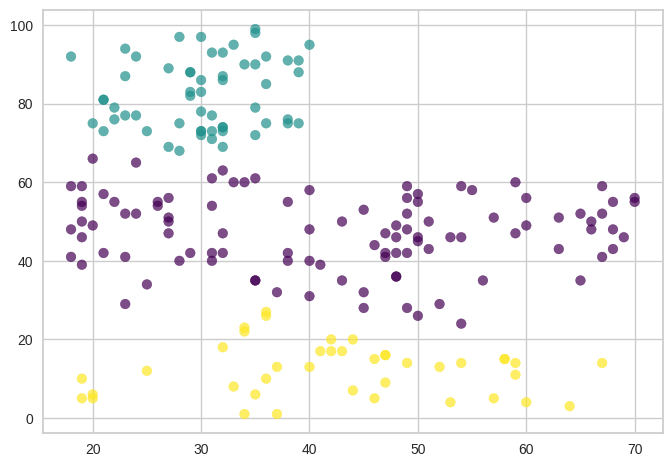

In [47]:

plt.scatter(X["Age"], X["Score"], c= model1.labels_, cmap= "viridis", alpha = 0.7);

## Clustering based on Annual Income and Spending Score- X

In [48]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X, model.labels_)})

f'Silhouette Score for {2} clusters {0.4549465643222241}
f'Silhouette Score for {3} clusters {0.4411791686353356}
f'Silhouette Score for {4} clusters {0.4602496389565028}
f'Silhouette Score for {5} clusters {0.40374071753059787}
f'Silhouette Score for {6} clusters {0.4125958704145705}
f'Silhouette Score for {7} clusters {0.4158977524079244}
f'Silhouette Score for {8} clusters {0.3883688959732531}
f'Silhouette Score for {9} clusters {0.3948151533262091}


#### Annual Income and Spending Score- X2

In [49]:
hc_ward = linkage (y= X1, method ="ward")
hc_complete = linkage (X1, "complete")
hc_average = linkage (X1, "average")
hc_single= linkage(X1 ,"single")

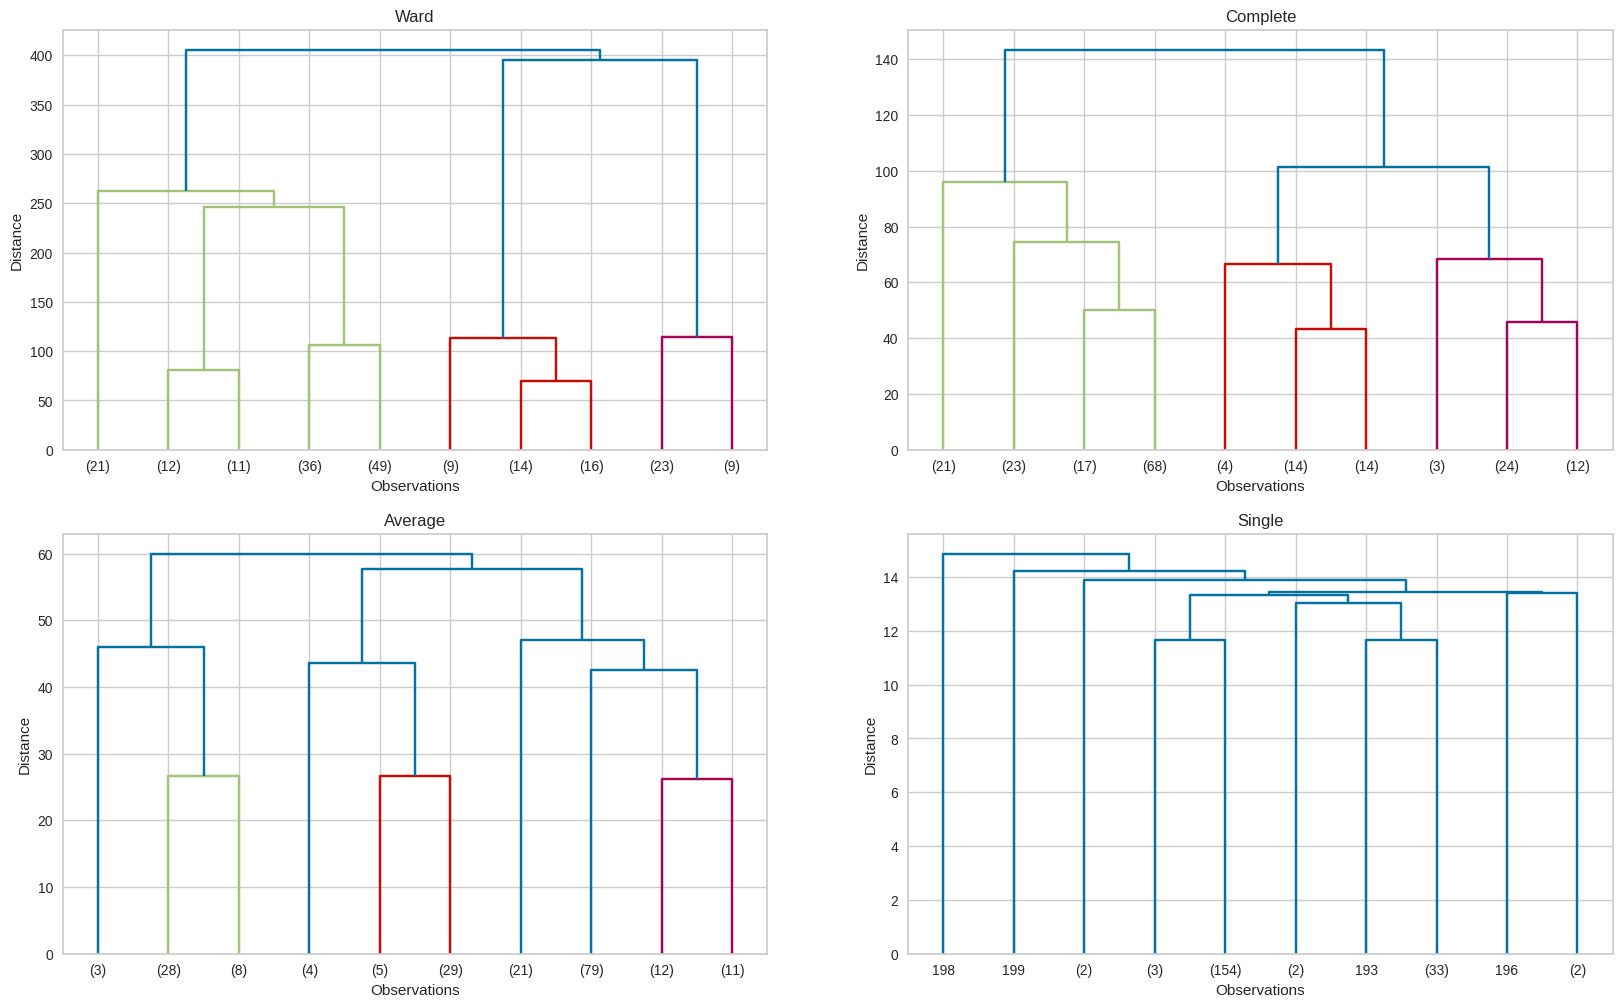

In [50]:


plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10);  # p is the last leaf

It seems that the optimal number of clusters is 4.

In [51]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X1)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X, model.labels_)})

f'Silhouette Score for {2} clusters {0.12564898127886656}
f'Silhouette Score for {3} clusters {0.1763037085315914}
f'Silhouette Score for {4} clusters {0.1722707063503673}
f'Silhouette Score for {5} clusters {0.16147962304006064}
f'Silhouette Score for {6} clusters {0.10287007384891328}
f'Silhouette Score for {7} clusters {0.04601538432255534}
f'Silhouette Score for {8} clusters {-0.0437148130766567}
f'Silhouette Score for {9} clusters {-0.048470040487134734}


In [52]:
model1 =  AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage = "ward")
model1.fit_predict(X1)

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

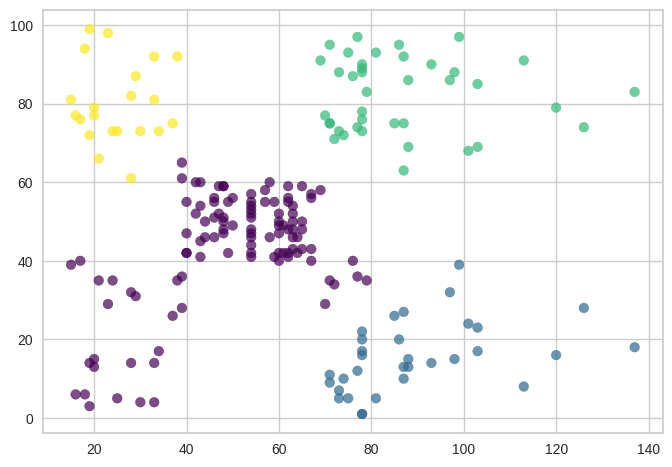

In [53]:
plt.scatter(X1["Income"], X1["Score"], c= model1.labels_, cmap= "viridis", alpha = 0.7);


### Conclusion

## Conclusion

It seems K-Means Clustering is better than Hierarchical Clustering. We are able to cluster the data into 5 clusters.


Model Interpretation Cluster 1 -> Earning less but spending more

Cluster 2 -> Average in terms of earning and spending

Cluster 3 -> Earning less , spending less

Cluster 4 -> earning less but spending more

Cluster 5 -> Earning high and also spending high

I would target cluster 5 based on their income and spending score.